# **Fundamentos de inteligencia artificial**
### Mg. Ing. Emerson Maximo Asto Rodriguez

La base de datos mnist https://en.wikipedia.org/wiki/MNIST_database

# 1. Red neuronal artificial (ANN)

In [7]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input
from keras.utils import to_categorical
import matplotlib.pyplot as plt

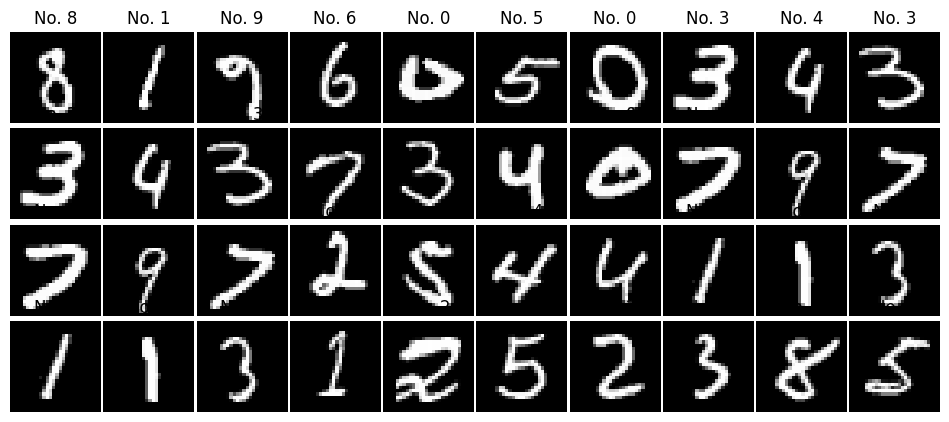

In [8]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

#MOSTRAR DIGITOS
rand_14 = np.random.randint(0, train_images.shape[0],40)
sample_digits = train_images[rand_14]
sample_labels = train_labels[rand_14]

num_rows, num_cols = 4, 10
f, ax = plt.subplots(num_rows, num_cols, figsize=(12,5),
                     gridspec_kw={'wspace':0.03, 'hspace':0.01},
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
        image_index = r * 7 + c
        ax[r,c].axis("off")
        ax[r,c].imshow(sample_digits[image_index], cmap='gray')
        ax[r,c].set_title('No. %d' % sample_labels[image_index])
plt.show()
plt.close()

In [9]:
# Normalizado
train_images = (train_images / 255)
test_images = (test_images / 255)

# Flatten
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

# Arquitectura del modelo
model = Sequential([
  Input(shape=(784,)),
  Dense(200, activation='relu'),
  Dropout(0,5),
  Dense(200, activation='relu'),
  Dropout(0,5),
  Dense(10, activation='softmax'),
])

# Compilando el modelo
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)


In [10]:
# Entrenado el modelo
history = model.fit(
  train_images,
  to_categorical(train_labels),
  validation_data=(test_images, to_categorical(test_labels)),
  epochs=20,
  batch_size=32,
)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9381 - loss: 0.2066 - val_accuracy: 0.9683 - val_loss: 0.1034
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9381 - loss: 0.2066 - val_accuracy: 0.9683 - val_loss: 0.1034
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9732 - loss: 0.0873 - val_accuracy: 0.9747 - val_loss: 0.0834
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9732 - loss: 0.0873 - val_accuracy: 0.9747 - val_loss: 0.0834
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9804 - loss: 0.0616 - val_accuracy: 0.9774 - val_loss: 0.0695
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9858 - loss: 0.0444 - val_accuracy: 0.9785 - val_loss: 0.0760
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9878 - loss: 0.0363 - val_accuracy: 0.9795 - val_loss: 0.0732
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9902 - loss: 0.0302 - 

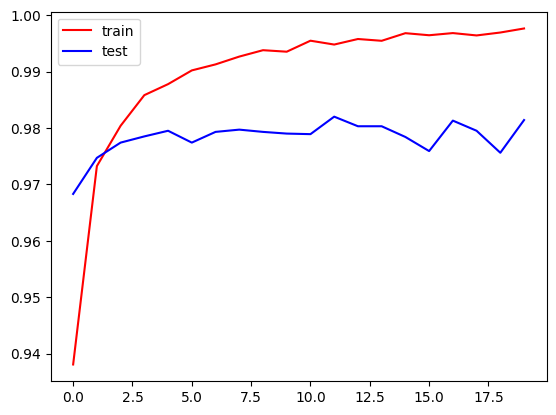

In [11]:
plt.plot(history.history["accuracy"], "r", label="train")
plt.plot(history.history["val_accuracy"], "b", label="test")
plt.legend()
plt.show()

In [12]:
from keras.models import load_model
from pickle import dump, load

model.save('my_model.h5')
del model

model = load_model('my_model.h5')

In [13]:
model.predict(test_images) > 0.5

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 715us/step


array([[False, False, False, ...,  True, False, False],
       [False, False,  True, ..., False, False, False],
       [False,  True, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]], shape=(10000, 10))

In [14]:
predicciones = (model.predict(test_images) > 0.5).astype("int32")
print(predicciones)
print(predicciones.argmax(axis=1))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step
[[0 0 0 ... 1 0 0]
 [0 0 1 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[7 2 1 ... 4 5 6]


In [15]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(test_labels, predicciones.argmax(axis=1))

array([[ 970,    2,    1,    0,    0,    0,    4,    1,    2,    0],
       [   0, 1125,    3,    0,    0,    1,    2,    1,    3,    0],
       [   3,    1, 1011,    1,    2,    0,    3,    4,    5,    2],
       [   0,    1,    4,  984,    0,   11,    0,    3,    5,    2],
       [   0,    0,    2,    0,  950,    1,   12,    2,    2,   13],
       [   2,    0,    0,    3,    0,  879,    4,    1,    1,    2],
       [   2,    2,    1,    0,    1,    3,  948,    0,    1,    0],
       [   3,    5,    9,    0,    0,    0,    0, 1005,    3,    3],
       [   2,    1,    2,    3,    0,    5,    3,    0,  957,    1],
       [   3,    2,    0,    2,    6,    7,    1,    2,    4,  982]])

In [16]:
print(classification_report(test_labels, predicciones.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.99      0.97      0.98      1010
           4       0.99      0.97      0.98       982
           5       0.97      0.99      0.98       892
           6       0.97      0.99      0.98       958
           7       0.99      0.98      0.98      1028
           8       0.97      0.98      0.98       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



# 2. Red neuronal convolucional (CNN)

In [17]:
from numpy import mean
from numpy import std
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD

In [18]:
def load_dataset():
    (trainX, trainY), (testX, testY) = mnist.load_data()

    trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
    testX = testX.reshape((testX.shape[0], 28, 28, 1))

    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    return trainX, trainY, testX, testY

In [19]:
def prep_pixels(train, test):
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')

    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    return train_norm, test_norm

In [20]:
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='uniform', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='uniform'))
    model.add(Dense(10, activation='softmax'))

    opt = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [21]:
#VALIDACION CRUZADA
def evaluate_model(dataX, dataY, n_folds=3):
    scores, histories = list(), list()

    kfold = KFold(n_folds, shuffle=True, random_state=1)

    for train_idx, test_idx in kfold.split(dataX):
        model = define_model()

        trainX, trainY, testX, testY = dataX[train_idx], dataY[train_idx], dataX[test_idx], dataY[test_idx]

        history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)

        _, acc = model.evaluate(testX, testY, verbose=0)
        print(">Accuracy %.3f" % (acc * 100.0))

        scores.append(acc)
        histories.append(history)
    return scores, histories

In [22]:
def summarize_diagnostics(histories):
    plt.figure(figsize=(12,8))
    ax1 = plt.subplot(2,1,1)
    ax2 = plt.subplot(2,1,2)

    for i in range(len(histories)):
        # plot loss
        ax1.plot(histories[i].history['loss'], color='blue', label=('train'+str(i)))
        ax1.plot(histories[i].history['val_loss'], color='orange', label=('test'+str(i)))

        # plot accuracy
        ax2.plot(histories[i].history['accuracy'], color='blue', label=('train'+str(i)))
        ax2.plot(histories[i].history['val_accuracy'], color='orange', label=('test'+str(i)))

    ax1.set_title('Cross Entropy Loss')
    ax1.legend()
    ax2.set_title('Classification Accuracy')
    ax2.legend()
    plt.show()


def summarize_performance(scores):
	print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
	plt.boxplot(scores)
	plt.show()

In [23]:
trainX, trainY, testX, testY = load_dataset()

# preprocesamiento
trainX, testX = prep_pixels(trainX, testX)

# creación modelo
model = define_model()

history = model.fit(trainX, trainY, epochs=15, batch_size=32, validation_data=(testX, testY), verbose=1)

Epoch 1/15


/Users/eastor112/Dev/university-lectures/pdsei_2025/.venv/lib/python3.13/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9165 - loss: 0.2695 - val_accuracy: 0.9580 - val_loss: 0.1293
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9697 - loss: 0.0985 - val_accuracy: 0.9787 - val_loss: 0.0696
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9805 - loss: 0.0631 - val_accuracy: 0.9809 - val_loss: 0.0571
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9854 - loss: 0.0458 - val_accuracy: 0.9844 - val_loss: 0.0468
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9891 - loss: 0.0346 - val_accuracy: 0.9836 - val_loss: 0.0521
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9917 - loss: 0.0267 - val_accuracy: 0.9853 - val_loss: 0.0452
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9941 - loss: 0.0199 - val_accuracy: 0.9860 - val_loss: 0.0434
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9951 - loss: 0.0154 - val_accurac

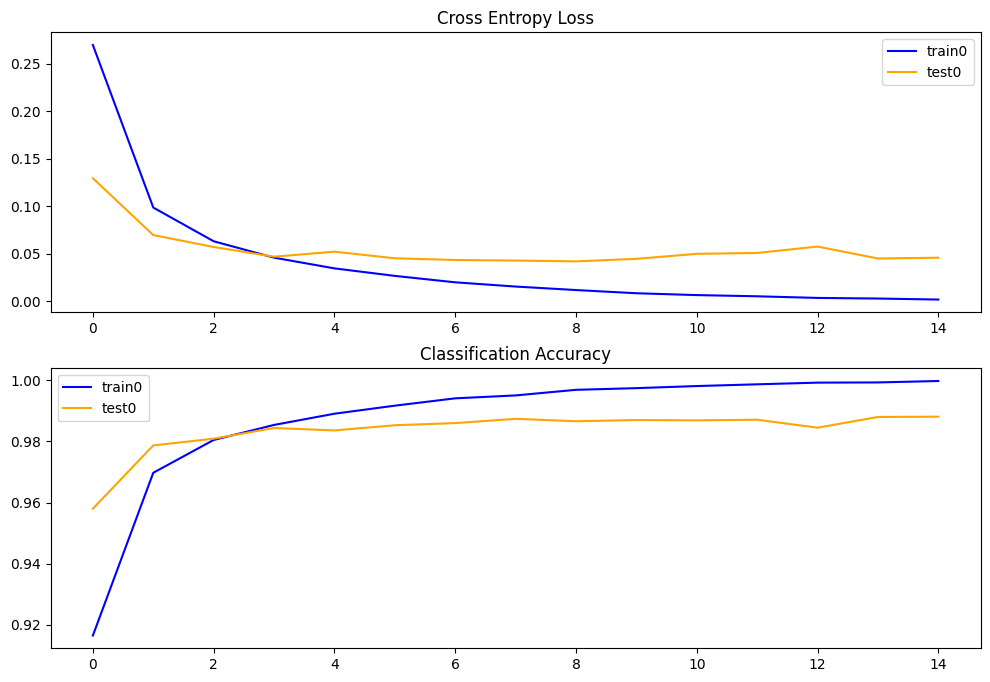

In [24]:
# Ploteo de curvas
summarize_diagnostics([history,])

In [25]:
def run_test_harness():
	trainX, trainY, testX, testY = load_dataset()

	# preprocesamiento
	trainX, testX = prep_pixels(trainX, testX)

	# evaluacion del modelo
	scores, histories = evaluate_model(trainX, trainY)

	# Ploteo de curvas
	summarize_diagnostics(histories)

	# Ploteo de rendimiento
	summarize_performance(scores)

>Accuracy 98.490
>Accuracy 98.220
>Accuracy 98.525


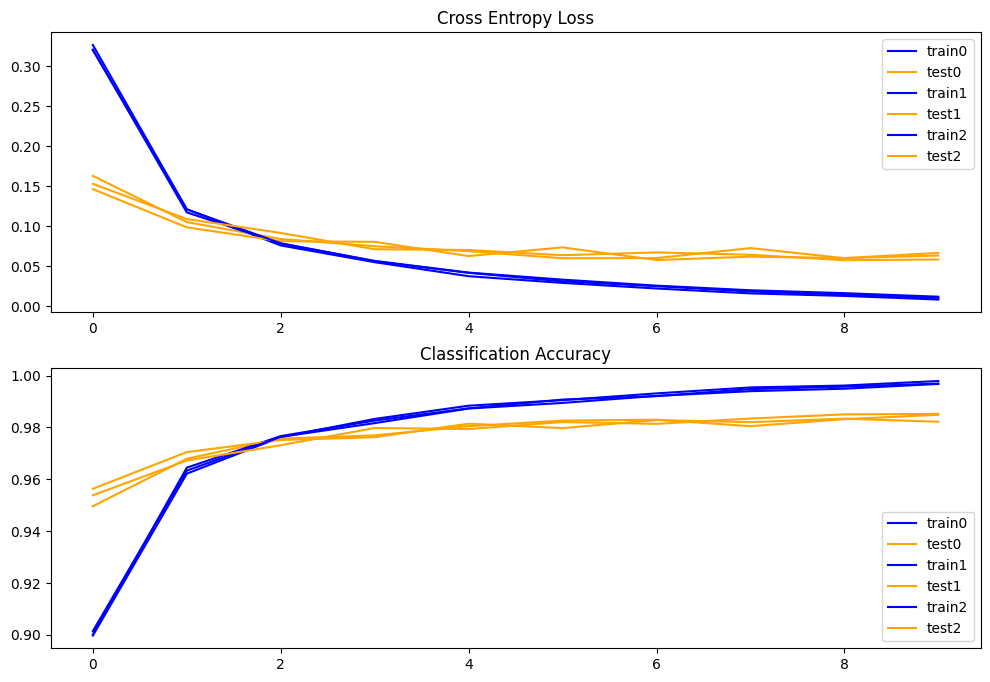

Accuracy: mean=98.412 std=0.136, n=3


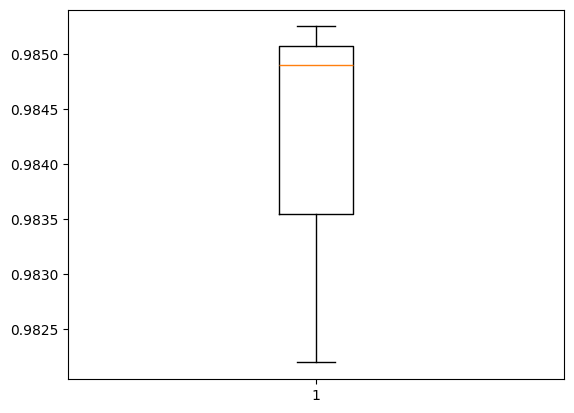

In [26]:
run_test_harness()